# Implementing a Perceptron

## 1. Installing libraries

In [2]:
%pip install numpy pandas matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 14.8/14.8 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00


## 2. Load the Dataset

In [13]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [14]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [15]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [16]:
X_train.shape

(20, 2)

In [17]:
y_train.shape

(20,)

In [18]:
import numpy as np

np.bincount(y_train)

array([10, 10], dtype=int64)

## 3. Visualizing the Dataset

In [19]:
import matplotlib.pyplot as plt

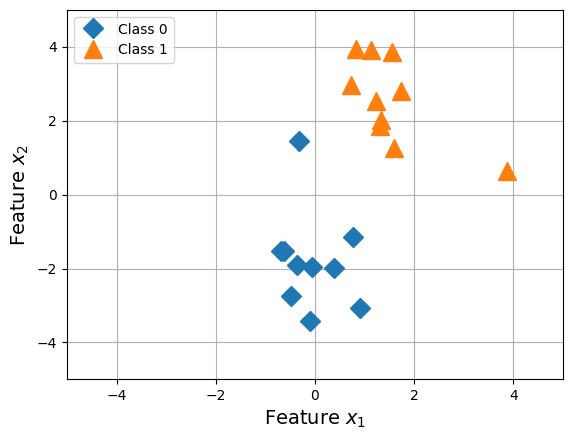

In [20]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=14)
plt.ylabel("Feature $x_2$", fontsize=14)

plt.grid()
plt.show()

## 4. Implementing the Preceptron

In [21]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(self.num_features)]
        self.bias = 0.0

In [22]:
ppn = Perceptron(num_features=2)

In [23]:
ppn.weights

[0.0, 0.0]

In [4]:
ppn.bias

0.0

In [24]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(self.num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [25]:
ppn = Perceptron(num_features=2)

X = [1.1, 2.1]
ppn.forward(X)

0

In [26]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(self.num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += x[i] * error

        return error

In [27]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x, true_y=1)

1

In [28]:
print("Model Parameters:")
print(f" Weights: {ppn.weights}")
print(f" Bias: {ppn.bias}")

Model Parameters:
 Weights: [1.1, 2.1]
 Bias: 1.0


In [29]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1}: errors {error_count}")

In [30]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1: errors 1
Epoch 2: errors 3
Epoch 3: errors 1
Epoch 4: errors 0
Epoch 5: errors 0


## 5. Evaluating Results

In [31]:
def compute_accuracy(model, all_x, all_y):
    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [32]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

## 6. Visualizing the Decision Boundary

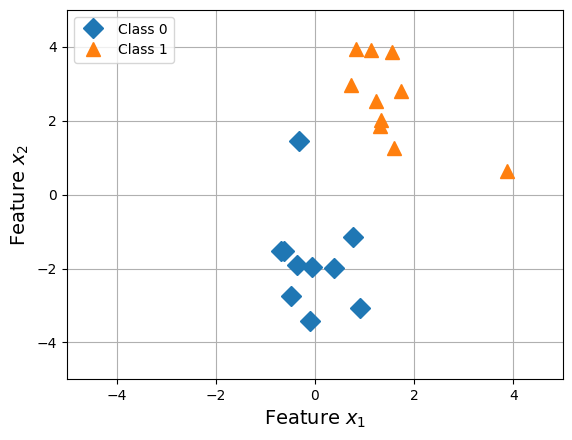

In [35]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=10,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=14)
plt.ylabel("Feature $x_2$", fontsize=14)

plt.grid()
plt.show()

In [36]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x2_min, x1_max, x2_max

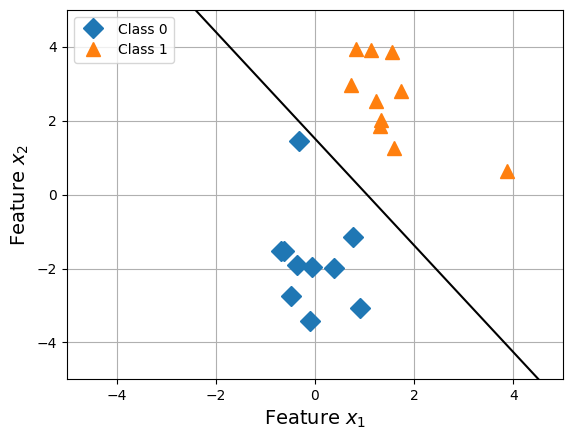

In [37]:
x1_min, x2_min, x1_max,x2_max = plot_boundary(ppn)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=10,
    linestyle="",
    label="Class 1"
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=14)
plt.ylabel("Feature $x_2$", fontsize=14)

plt.grid()
plt.show()